<a href="https://colab.research.google.com/github/khanfs/Modelling-Biology/blob/main/03_Continuous_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 3: Continuous systems

## Recap, dynamical systems

Recall that a dynamical system is a _system that changes with respect to time_.
There are two types of dynamical system, distinguished by whether time is modelled as _discrete_ or _continuous_.

## Variables versus parameters

One concept that we haven't discussed in much detail yet is the difference between variables and parameters.

_Parameters_ are treated as constants, and in most cases do not vary during the simulation of the model (although they may change across simulations).
Examples of parameters are:

- reaction rates
- birth and death rates
- (sometimes) concentrations

_Variables_ are the quantities that are explicitly able to vary.
Often these are the features of the system that you are most interested in.
Examples of variables are:

- populations
- speeds
- concentrations

Depending on the scale and approach of the model you are building, sometimes certain quantities will be incorporated as parameters, other times variables.

Often we will say a system with $n$ variables is _$n$-dimensional_.

## Continuous dynamical systems

Continuous dynamical systems generally take the form of _ordinary differential equations (ODEs)_.
We have a function, $f$, which tells us the rate of change of the state of the system, $x$:

$$ \frac{dx}{dt} = f(x)$$

Often, $x$ is actually a _vector_ of variables $(x_1, x_2, \ldots, x_n)$.
In this case we can write:

$$ \frac{dx_i}{dt} = f_i(x_1, x_2, \ldots, x_n) \text{ with } 0\leq i \leq n$$

Or in alternative notation:

$$ \frac{d}{dt}\begin{bmatrix}x_1\\x_2\\\ldots\\x_n\end{bmatrix} = f\left(\begin{bmatrix}x_1\\x_2\\\ldots\\x_n\end{bmatrix}\right)$$

Note that $x_i$ is a function of time, so we can also write $x_i(t)$.

## Example, bacterial growth

The doubling time for _E. coli_ is approximately 20 minutes.
This means that given an initial population size of $n$ cells, after 20 minutes there will be $2\times n$ cells.

How many cells will there be after $t$ time?

### Model outline

**Aim:** To predict the density of _E. coli_ after arbitrary time.

**Scale:** Population-level

**Approach/method:** Continuous dynamical system

**Simplifications:**

- The population size can be approximated with a continuous number.
- _E. coli_ never die.
- Conditions are ideal for _E. coli_ growth.
- Unlimited resources for growth (no carrying-capacity).

**Assumptions:**

- ...

### Model mathematics

Let $N(t)$ be the bacterial density at time $t$.

Let $K$ be the rate of reproduction per unit time. Note that this is _not_ the doubling rate, we will have to calculate $K$ from the doubling rate.

So the bacterial density is described by the equation:

$$\frac{dN}{dt} = KN $$

What is your prediction for the behaviour of the system for different values of $K$?

Often, ODE models are complicated, and to investigate their behaviour we would need to numerically (computationally) integrate the equations.
However, in this case, we can solve the equation analytically.

$$\begin{aligned}
    \int_0^t \frac{1}{N}dN &= \int_0^t K dt \\
    \log N \big|_0^t &= Kt \\
    \log(N(t)) - \log(N(0)) &= Kt \\
    \log(N(t)) &= Kt + \log(N(0)) \\
    N(t) &= N_0 e^{Kt}
    \end{aligned}$$

Where $N_0 = N(0)$ is the initial (population) density.

We see _exponential growth_. Is it biologically plausible for the system to grow exponentially (unbounded)? What about at small $t$?

#### Calculating $K$ from the doubling time

We know the doubling time is 20 minutes, so:

$$\frac{N(20)}{N_0} = 2 \implies  \frac{N_0 e^{20K}}{N_0} = e^{20K} = 2 $$

Rearranging gives:

$$K = \frac{\log(2)}{20} \approx 0.015$$

### Model simulation

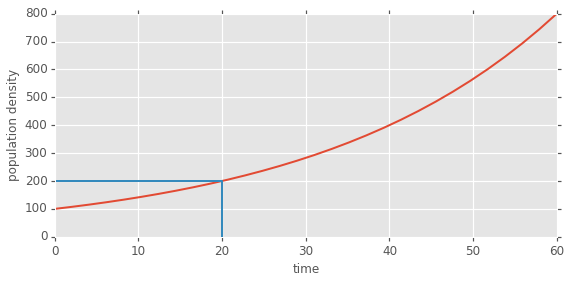

K = 0.035


<function python.f03.plot_exp>

In [ ]:
from python.f03 import *
%matplotlib inline

interact(plot_exp)

### Modifying assumptions/simplifications

How could we modify the assumptions and simplifications in order to produce a more realistic model (without unbounded growth)?

1. add an explicit carrying-capacity
2. add a death rate
3. add an explicit variable for the remaining  concentration of nutrients
4. ...

We will use the third option.

**Simplifications:**

- ~~Unlimited resources for growth (no carrying-capacity).~~
- $\alpha$ units of nutrient are consumed in producing one unit of population.

**Assumptions:**

- Bacterial growth is linearly proportional to the nutrient concentration present.
- Nutrients are used by the bacteria consistently.

### Modifying the model

Let $C$ be the nutrient concentration.
Replacing $K$ with $kC(t)$ gives the model equations:

$$\begin{aligned}
    \frac{dN}{dt} &= kCN \\
    \frac{dC}{dt} &= -\alpha kCN
    \end{aligned}$$
    
Again, we can find an analytical (mathematical) solution.
Note that:

$$\begin{aligned}
    \frac{dC}{dt} &= -\alpha \frac{dN}{dt} \\
    \int_0^t dC &= -\alpha \int_0^t dN \\
    C(t) - C(0) &= -\alpha \left(N(t) - N(0)\right) \\
    C(t) &= -\alpha N(t) + C_0
    \end{aligned}$$
    
Where $C_0 = C(0) + \alpha N(0)$. 

So we can rewrite the two original equations as a single equation:

$$\frac{dN}{dt} = k(C_0 - \alpha N)N$$
    
Let $r = kC_0$ and $B=\frac{C_0}{\alpha}$.
    
$$\frac{dN}{dt} = r N \left(1 - \frac{N}{B}\right)$$

What does this remind you of?
(The logistic map, with $B$ the carrying capacity and $r$ the fecundity.)

Again, we can non-dimensionalise this equation, by using: 

$$x = \frac{N}{B} \implies \frac{dx}{dt} = \frac{1}{B}\frac{dN}{dt}$$

This gives:

$$\frac{dx}{dt} = r x \left(1 - x\right)$$

To find an explicit solution we need to integrate this equation:

$$\begin{aligned}
    \int_0^t \frac{a}{x (1 - x)} dN &= \int_0^t r dt \\
    \log\left(\tfrac{x}{1-x}\right) \big|_0^t &= r t \\
    \log\left(\tfrac{x(t)}{1- x(t)}\right) - \log\left(\tfrac{x_0}{1 - x_0}\right) &= r t \\
    \tfrac{x(t)}{1 - x(t)}\times\tfrac{1 - x_0}{x_0}&= e^{r t}\end{aligned}$$
    
Rearranging gives: 

$$x(t) = \frac{1}{1 + \left(\frac{1}{x_0} - 1\right) e^{-rt}} $$

### Simulating the model

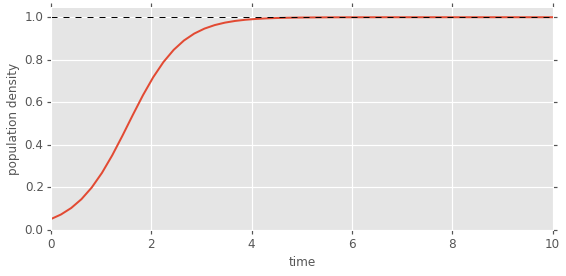

<function python.f03.plot_lf>

In [ ]:
interact(plot_lf)

### Biological interpretation

- Exponential growth at small time.
- Tending towards a steady-state at large time.

**Note** the parameter $B$ ($x(t) = \frac{N(t)}{B}$) now respects the alternate definition of the carrying capacity to that used in the discrete systems session:

> The maximum population size that the environment can _sustain indefinitely_ (i.e. at equilibrium).

## Example, predator-prey

> The Lotka–Volterra predator–prey model was initially proposed by **Alfred J. Lotka** in the theory of autocatalytic chemical reactions in 1910.
> ... In 1920 Lotka extended, via Kolmogorov (see above), the model to "organic systems" using a plant species and a herbivorous animal species as an example and in 1925 he utilised the equations to analyse predator-prey interactions in his book on biomathematics arriving at the equations that we know today.
> **Vito Volterra**, who made a statistical analysis of fish catches in the Adriatic Sea independently investigated the equations in 1926. [Wikipedia](https://en.wikipedia.org/wiki/Lotka–Volterra_equations)

Imagine two competing species, one prey and one predator.
The prey are born according to exponential growth, and die in proportion to the predator population (predation).
The predators produce offspring depending on the prey population (sustainance), and die according to exponential decay.

We would like to know the effect of perturbing the system on the long-term dynamics.

### Model outline

**Aim:** To predict the population of predators and prey after arbitrary time.

**Scale:** Population-level

**Approach/method:** Continuous dynamical system

**Simplifications:**

- The population sizes can be approximated with continuous numbers.
- Unlimited resources for growth of the prey species (no carrying-capacity).
- No genders (average fecundity).
- No external influences.
- Prey death purely by predation.
- ...

**Assumptions:**

- Prey birth is well-approximated by exponential growth.
- Predator birth is directly dependent on prey population.

### Model mathematics

\begin{align}
\frac{dx}{dt} = ax - bxy \\
\frac{dy}{dt} = cxy - dy
\end{align}

Where $x$ is the number of prey, $y$ is the number of predators, $a$ is the birth rate of prey in the absence of predators, $b$ is the predator-induced death rate, $c$ is the prey-induced gain in birth rate of the predators, $d$ is the net death rate of the predators in the absence of prey.

These equations are known as the _predator-prey_ or  _Lotka-Volterra_ equations.

### Checking dimensions, units

One way of checking that your final model is consistent is to verify that the dimensions and units match.

In this case we have $x$ and $y$ with units _number (of animals) $N$_.
So $\frac{dx}{dt}$ and $\frac{dy}{dt}$ must have units _number (of animals) per time $NT^{-1}$_.

$$\underbrace{\frac{dx}{dt}}_{NT^{-1}} = a \underbrace{x}_{N} - b \underbrace{x y}_{N^2} $$

So $a$ must have units $T^{-1}$, and $b$ must have units $N^{-1}T^{-1}$

Similarly $c$ must have units $N^{-1}T^{-1}$, and $d$ must have units $T^{-1}$

### Parameter reduction (non-dimensionalisation)

There are four parameters in the predator-prey model, $a$, $b$, $c$, and $d$.
We would like to try to reduce the number of parameters.

Sometimes the approach to take can be obvious (as in the previous examples with the carrying capacity).
However, other times this can be less clear — one approach in this case is the following.

Let $\alpha_i$ be some (unknown) combination of the parameters, and let:

$$\begin{aligned}
    x &= \alpha_1 x^\prime \\
    y &= \alpha_2 y^\prime \\
    t &= \alpha_3 t^\prime
    \end{aligned}$$
    
We can substitute these into our original equation:

$$\begin{aligned}
    \frac{dx}{dt} = \frac{\alpha_1}{\alpha_3}\frac{dx^\prime}{dt^\prime}
        &= \alpha_1 x^\prime (a - b \alpha_2 y^\prime) \\
    \frac{dy}{dt} = \frac{\alpha_2}{\alpha_3}\frac{dx^\prime}{dt^\prime}
        &= \alpha_2 y^\prime (c \alpha_1 x^\prime - d) 
    \end{aligned}$$
    
Which we can rearrange to get:

$$\begin{aligned}
    \frac{dx^\prime}{dt^\prime}
        &= a \alpha_3 x^\prime - b \alpha_2 \alpha_3 x^\prime y^\prime \\
    \frac{dx^\prime}{dt^\prime}
        &= c \alpha_1 \alpha_3 x^\prime y^\prime - d \alpha_3 y^\prime
    \end{aligned}$$
    
Now we just need to choose $\alpha_1$, $\alpha_2$, and $\alpha_3$ so that the equations become as simple as possible.
Generally there will be multiple sensible options, some of which may be more or less useful in future analysis.

We will choose:

$$c \alpha_1 \alpha_3 = 1,\; b \alpha_2 \alpha_3 = 1,\;\alpha_3 = \frac{1}{a}\\
\implies \alpha_1 = \frac{a}{c},\;\alpha_2 = \frac{a}{b} $$

This means our system can be written as follows, dropping the primes (apostrophes):

$$\begin{aligned}
    \frac{dx}{dt} &= x(1 - y) \\
    \frac{dy}{dt} &= y(x - r)
    \end{aligned}$$

Where $r = \frac{d}{a}$, is the ratio of the death rate of the predators to the birth rate of the prey.
So we have reduced the system to a single parameter.

The system has also been non-dimensionalised, $x$ and $y$ are now dimensionless variables, and $r$ is a dimensionless parameter.

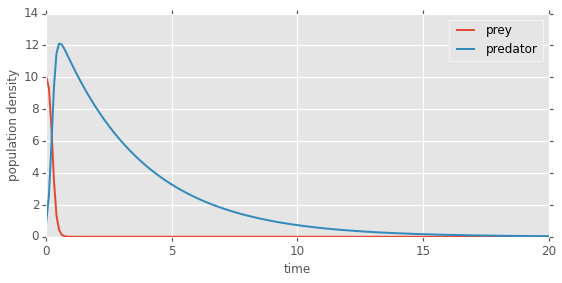

<function python.f03.plot_lv>

In [ ]:
interact(plot_lv)

What happens when $r$ varies?

What happens at, for example, $r=2$, $x_0=2$?

## Steady-states

The _steady-states_ of a continuous ODE system are given by the solutions to:

$$\frac{dx_i}{dt} = 0$$

For the predator-prey model:

$$\begin{aligned}
    \frac{dx}{dt} = 0 &= x(1 - y) \\
    \frac{dy}{dt} = 0 &= y(x - r)
    \end{aligned}$$

So from the first equation either $x=0$ or $y=1$, from the second equation either $y=0$ or $x=r$.
So the steady-state solutions must be:

$$ (0,0) \text{ and } (r,1)$$

What do these represent?

## Phase plane analysis

An alternative way of plotting the dynamics of a 2-dimensional system is to draw a _phase plane diagram_ also known as a _phase portrait_.

Instead of plotting the dependent ($x$, $y$) variables against the independent variable ($t$), we plot the dependent variables against each other, and let time be implicit.

For example, the predator-prey model.
(Here each arrow corresponds to one unit of time.)

For any initial condition $(x_0,y_0)$ we follow a _trajectory_ through the phase space as time increases.

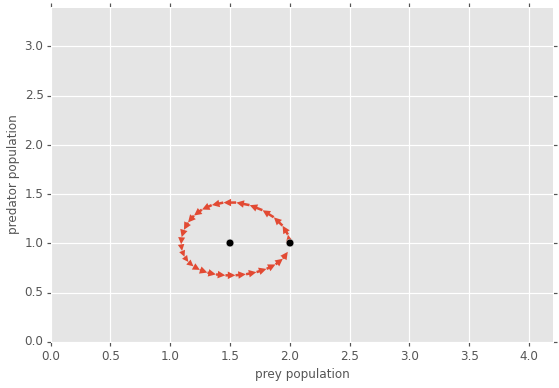

<function python.f03.plot_lv_pp>

In [ ]:
interact(plot_lv_pp)

Actually, because the system is deterministic (as opposed to stochastic/probabilistic) we can actually plot the trajectories of every point in the plane.
These trajectories will never cross, although they can converge and diverge.

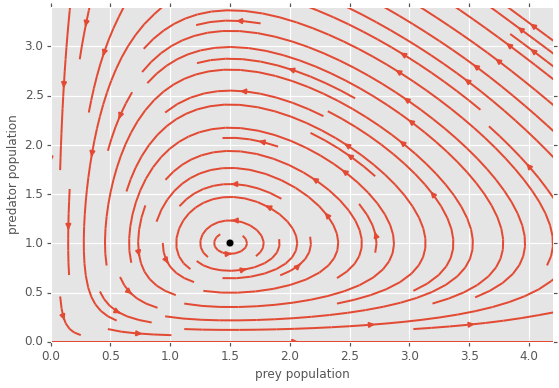

In [ ]:
plot_lv_stream()

## Stability of steady-states

We would like to know how to find the stability of the steady-states of a continuous system.
Again, we are going to consider the (approximately) linear dynamics very close to the steady-state.

We want to linearlise the system around the steady state $(x^\ast, y^\ast)$.

(Assuming a 2-dimensional system) let $u = x - x^*$ and $v = y - y^*$, and use a Taylor series expansion:

$$\begin{aligned}
    \frac{dx}{dt} &= f(x,y) \\
    \frac{du}{dt} &= f(x^* + u, y^* + v) \\
    \frac{du}{dt} &= f(x^*, y^*) + u \frac{\partial f}{\partial x}(x^*, y^*) + v \frac{\partial g}{\partial y}(x^*, y^*) + \ldots \\
    \frac{du}{dt} &= u \frac{\partial f}{\partial x}(x^*, y^*) + v \frac{\partial f}{\partial y}(x^*, y^*)
    \end{aligned}$$

Similarly:
$$\frac{dy}{dt} = g(x,y) \implies \frac{dv}{dt} = u \frac{\partial g}{\partial x}(x^*, y^*) + v \frac{\partial g}{\partial y}(x^*, y^*)$$

This is now our linearised system. It helps to write the system in vector/matrix notation:

$$\begin{bmatrix}\frac{du}{dt} \\ \frac{dv}{dt}\end{bmatrix}
    = \begin{bmatrix}\frac{\partial f}{\partial x}
        & \frac{\partial f}{\partial y}
        \\ \frac{\partial g}{\partial x}
        & \frac{\partial g}{\partial y}\end{bmatrix}
    \begin{bmatrix}u \\ v\end{bmatrix}$$

The matrix of partial derivatives is known as the _Jacobian_:

$$J = \begin{bmatrix}\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\ \frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}\end{bmatrix}
    = \begin{bmatrix}a_{11} & a_{12}\\a_{21} & a_{22}\end{bmatrix}$$
    
### Solving the linearised system    
    
It is possible to write this first-order 2-dimensional system as a second-order 1-dimensional system.
First differentiate the first equation:

$$0 = \frac{d^2u}{dt^2} - a_{11} \frac{du}{dt} - a_{12} \frac{dv}{dt}$$

Substitute in the value of $\frac{dv}{dt}$ from the second equation:

$$0 = \frac{d^2u}{dt^2} - a_{11} \frac{du}{dt} - a_{12} \left(a_{21} u + a_{22} v\right) $$

Substitute in the value of $v$ taken from rearranging the first equation (before it was differentiated):

$$\begin{aligned}
    0 &= \frac{d^2u}{dt^2} - a_{11} \frac{du}{dt} - a_{12} \left(a_{21} u +  
    \frac{a_{22}}{a_{12}}\left(\frac{du}{dt} - a_{11} u\right)\right) \\
    0 &= \frac{d^2u}{dt^2} - a_{11} \frac{du}{dt} - a_{12} a_{21} u -  
    a_{22}\left(\frac{du}{dt} - a_{11} u\right) \\
    0 &= \frac{d^2u}{dt^2} - (a_{11} + a_{22}) \frac{du}{dt} + (a_{11} a_{22} - a_{12} a_{21}) u \\
    0 &= \frac{d^2u}{dt^2} - \beta \frac{du}{dt} + \gamma u
    \end{aligned}$$
  
Where $ \beta = a_{11} + a_{22}$ (the _trace_ of $J$), and $\gamma = a_{11} a_{22} - a_{12} a_{21}$ (the _determinant_ of $J$).

We can try the solution, $ u = e^{\lambda t}$:

$$\begin{aligned}
    0 &= \lambda^2 e^{\lambda t} - \beta \lambda e^{\lambda t} + \gamma e^{\lambda t} \\
    0 &= \lambda^2 - \beta \lambda + \gamma 
    \end{aligned}$$
    
This is known as the _characteristic equation_.
Solutions to this are of the form:

$$ \lambda_\pm = \tfrac{1}{2}\left(\beta \pm \sqrt{\delta}\right)$$

Where $\lambda_+t$ and $\lambda_+t$ are the _eigenvalues_ of the system.

The quantity $\delta = \beta^2 - 4\gamma$ is known as the _discriminant_.

Recall that the linearised system is a pair of coupled linear differential equations, and so it will have a solution of the form:

$$\begin{aligned}
    u &= c_1 e^{\lambda_+t} + c_2 e^{\lambda_-t} \\
    v &= c_3 e^{\lambda_+t} + c_4 e^{\lambda_-t}
    \end{aligned}$$
    
Can you make any predictions with what will happen for different values of $e^{\lambda_+t}$ and $e^{\lambda_-t}$?

The perturbation will grow if either or both of $\lambda_+t$ or $\lambda_+t$ are positive, and shrink if both are negative.

#### Extension: finding the constants

Although the qualitative behaviour of the linearised system only depends on the value of the eigenvalues, it is possible to find general equations for the $c_i$.

Differentiating the solution for $u$, at $t=0$ gives:

$$\frac{d}{dt}u(0) = c_1 \lambda_+ + c_2 \lambda_- $$

But we also know (from before):

$$\frac{d}{dt}u(0) = a_{11} u(0) + a_{21} v(0)$$

Setting them equal gives:

$$ c_1 \lambda_+ + c_2 \lambda_- =  a_{11} u(0) + a_{21} v(0)$$

Substitute $c_2 = u(0) - c_1 $:

$$\begin{aligned}
    c_1 \lambda_+ + (u(0) - c_1) \lambda_- &= a_{11} u(0) + a_{21} v(0) \\
    c_1 (\lambda_+ - \lambda_-) &= (a_{11} - \lambda_-)u(0) + a_{21} v(0) 
    \end{aligned}$$
    
This gives:

$$\begin{aligned}
    c_2 &= \frac{a_{11} - \lambda_-}{\lambda_+ - \lambda_-}u(0) + \frac{a_{12}}{\lambda_+ - \lambda_-} v(0) \\
    c_1 &= \frac{\lambda_+ - a_{11}}{\lambda_+ - \lambda_-}u(0) - \frac{a_{12}}{\lambda_+ - \lambda_-} v(0)\;\text{ from } c_1 = u(0) - c_2
    \end{aligned}$$
    
Similarly:

$$\begin{aligned}
    c_3 &=  \frac{a_{22} - \lambda_-}{\lambda_+ - \lambda_-} v(0) + \frac{a_{21}}{\lambda_+ - \lambda_-}u(0) \\
    c_4 &= \frac{\lambda_- - a_{22}}{\lambda_+ - \lambda_-} v(0) - \frac{a_{21}}{\lambda_+ - \lambda_-}u(0) 
    \end{aligned}$$

## Eigenvalues, steady-states

- stable steady-state when eigenvalues negative
- unstable steady-state when eigenvalues positive
- (unstable) saddle point when one positive, one negative

$$ \lambda_\pm = \tfrac{1}{2}\left(\beta \pm \sqrt{\beta^2 - 4\gamma}\right)$$

Spirals and centres occur when the eigenvalues are complex.

As the value of the eigenvalues change (as a function of the parameters) we can observe _bifurcations_ — changes in the qualitive dynamics of the system.

eigenvalues: -0.500 + 1.118i, -0.500 + -1.118i


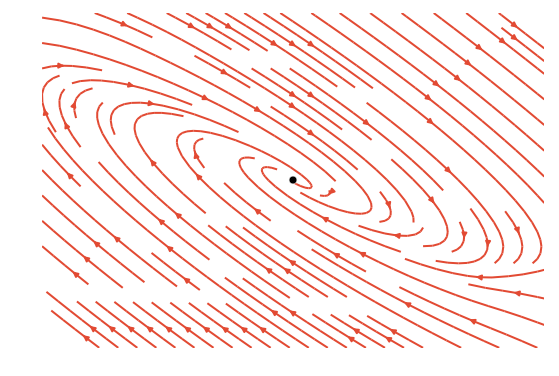

<function python.f03.plot_ss>

In [ ]:
interact(plot_ss)
# stable -3,2   s. spiral -1,2   unstable 3,2   u. spiral 1,2
# center  0,2   saddle pt 0,-2

![Stability as a function of the determinant and trace](images/03_stability.png)

## Stability of the predator-prey model

For the predator-prey model:

$$\begin{aligned}
    \frac{dx}{dt} = 0 &= x(1 - y) \\
    \frac{dy}{dt} = 0 &= y(x - r)
    \end{aligned}$$
    
With steady-state solutions:

$$ (0,0) \text{ and } (r,1)$$

We have:

$$J = \begin{bmatrix} 1 - y & -x \\ y & x - r \end{bmatrix}$$

So for the $(0,0)$ steady-state:

$$J = \begin{bmatrix} 1 & 0 \\ 0 & - r \end{bmatrix}$$

Eigenvalues:

$$\begin{aligned}
    \lambda_\pm &= \tfrac{1}{2}\left(1 - r \pm \sqrt{(1 - r)^2 + 4r}\right) \\
    \lambda_\pm &= \tfrac{1}{2}\left(1 - r \pm (1 + r)\right) \\
    \lambda_+ &= 1 \;\text{ and }\; \lambda_- = -r
    \end{aligned}$$

Which is a unstable saddle point.

So for the $(r,1)$ steady-state:

$$J = \begin{bmatrix} 0 & -r \\ 1 & 0 \end{bmatrix}$$

Eigenvalues:

$$\begin{aligned}
    \lambda_\pm &= \tfrac{1}{2}\left(0 \pm \sqrt{0 - 4r}\right) \\
    \lambda_\pm &= \pm \sqrt{-r} \\
    \lambda_+ &= i\sqrt{r} \;\text{ and }\; \lambda_- = -i\sqrt{r}
    \end{aligned}$$

Which is a centre (as we've already seen).

## Backtracking, biological implication of the predator-prey system

What has the investigation of the predator-prey system told us about how we expect similar systems to behave?

Is the model realistic? Is the model useful?

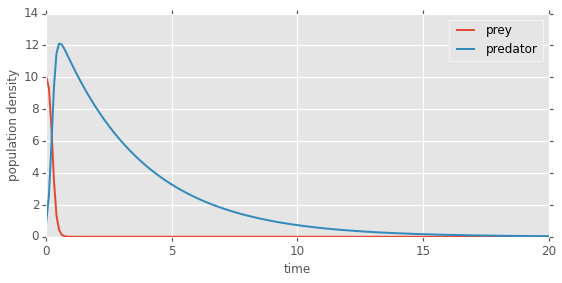

<function python.f03.plot_lv>

In [ ]:
interact(plot_lv) #5,10 #5,1

## Example, SIR model

A simple model of an infectious disease:

$$ \text{susceptible, }S \overset{\beta}{\rightarrow} \text{infected, }I \overset{\nu}{\rightarrow} \text{recovered, }R \overset{\gamma}{\rightarrow} \text{susceptible, }S $$ 

### Model outline

**Aim:** To predict whether an outbreak will occur.

**Scale:** Population-level

**Approach/method:** Continuous dynamical system

**Simplifications:**

- The population can be divided into: susceptible, infected, and recovered.
- Individuals become infected at a rate depending on the number of infected.
- Infected become recovered at some rate.
- No births, immigration, etc.

**Assumptions:**

- Recovered individuals are immune to the disease for a short period of time.
- The disease is non-fatal.
- No quarantine will be put in place.
- All interaction beteen susceptible and infected leads to the susceptible being infected.

### Model mathematics

$$\begin{aligned}
    \frac{dS}{dt} &= -\beta I S + \gamma R \\
    \frac{dI}{dt} &= \beta I S - \nu I \\
    \frac{dR}{dt} &= \nu I - \gamma R 
    \end{aligned}$$
    
This is a slightly more general form of the most basic SIR model (where $\gamma=0$).
    
### Model analysis

Let $N$ be the total population, then we have the _conservation law_:

$$ N = S + I + R$$

We can normalise $S$, $I$, and $R$ to proportions of the population by setting $N=1$.

We can use this to remove $R$ from the original system.
(In general a conservation law lets us remove one dimension from a system.)
We have:

$$\begin{aligned}
    \frac{dS}{dt} &= -\beta I S + \gamma (1 - S - I) \\
    \frac{dI}{dt} &= \beta I S - \nu I
    \end{aligned}$$

This has steady-states when:

$$0 = (\beta S - \nu) I$$

So either $I = 0$ and so $S = 1$, or $\beta S - \nu = 0$, $S = \frac{\nu}{\beta}$ and so:

$$\begin{aligned}
    0 &= -\nu I + \gamma \left(1 - \frac{\nu}{\beta} - I\right) \\
    I &= \frac{\gamma \left(\beta - \nu\right)}{\beta(\nu + \gamma)}
    \end{aligned}$$
    
So the steady-states are:

$$ (1,0) \text{ and } \left(\frac{\nu}{\beta}, \frac{\gamma \left(\beta - \nu\right)}{\beta(\nu + \gamma)}\right)$$

What happens when $\beta < \nu$?

The removal rate from the infectious class is $\nu$, so the average period of infectivity is $\frac{1}{\nu}$.
The rate at which infectious individual meets susceptible individuals is $\beta$, so 
So $\frac{\beta}{\nu}$ is the average number of susceptible individuals an infectious individual meets during the time they are infectious.
Let $\sigma = \frac{\beta}{\nu}$, this is sometimes called the _intrinsic reproductive rate of the disease_.

The second steady-state is only relevant when it is positive, when $\beta > \nu$ or $\sigma > 1$.

What happens when $\gamma=0$?

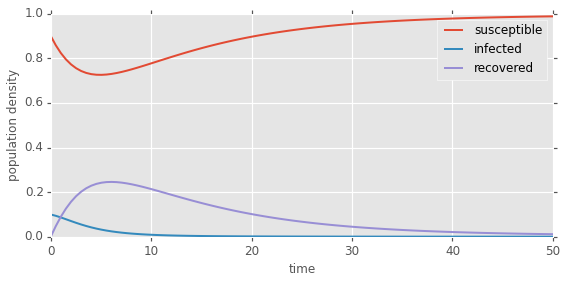

<function python.f03.plot_sir>

In [ ]:
interact(plot_sir)

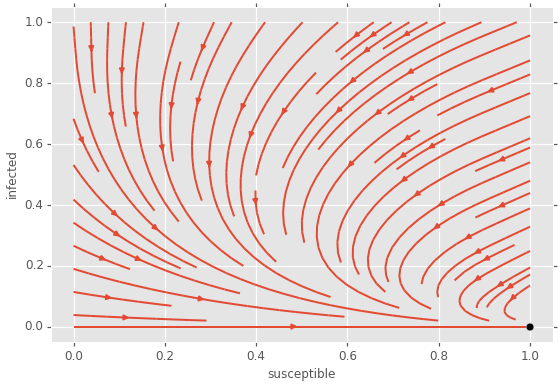

<function python.f03.plot_sir_pp>

In [ ]:
interact(plot_sir_pp)

The Jacobian is:

$$ J = \begin{bmatrix}
    -\beta I - \gamma &
    -\beta S - \gamma \\
    \beta I &
    \beta S - \nu
    \end{bmatrix}$$
    
For the $(1,0)$ steady-state:

$$ J = \begin{bmatrix}
    - \gamma &
    - \beta - \gamma \\
    0 &
    \beta - \nu
    \end{bmatrix}$$
    
Which gives eigenvalues:

$$\begin{aligned}
    \lambda_\pm &= \frac{1}{2}\left(\beta - \nu - \gamma
    \pm \sqrt{(\beta - \nu - \gamma)^2 + 4\gamma(\beta - \nu)} \right) \\
    \lambda_\pm &= \frac{1}{2}\left(\beta - \nu - \gamma
    \pm (\beta - \nu + \gamma) \right) \\
    \lambda_+ &= -\gamma,\; \lambda_- = \beta - \nu
    \end{aligned}$$

So this is stable if $\beta < \nu$ (that is $\sigma < 1$), and an unstable saddle node otherwise.
    
For the $\left(\frac{\nu}{\beta}, \frac{\gamma \left(\beta - \nu\right)}{\beta(\nu + \gamma)}\right)$ steady-state:

$$ J = \begin{bmatrix}
    -\beta I^\ast - \gamma &
    -\nu - \gamma \\
    \beta I^\ast &
    0
    \end{bmatrix}$$
    
$$ J = \begin{bmatrix}
    -\frac{\gamma \left(\beta - \nu\right)}{(\nu + \gamma)} - \gamma &
    -\nu - \gamma \\
    \frac{\gamma \left(\beta - \nu\right)}{(\nu + \gamma)} &
    0
    \end{bmatrix}$$

The eigenvalues for this system are complicated, however we can work out the stability by looking at the determinant and trace:

$$ \text{determinant} = a_{11} a_{22} - a_{12} a_{21} = - \beta I^\ast (\nu + \gamma) $$

$$ \text{trace} = a_{11} + a_{22} = - \beta I^\ast - \gamma $$

So if $\beta > \nu$ (that is $\sigma > 1$) then the trace is negative, and the determinant is positive. And so the steady-state is stable under this condition.

We have a transcritical bifurcation, where the two steady-states exchange their stability when $\beta = \nu$.
This also corresponds to the second steady-state becoming physically relevant.

## Biological implication of the SIR system

What do these results about the location and stability of the steady-states mean (as a function of the ratio of $\beta$ to $\nu$?

Is the model realistic? Is the model useful?

## Extension: 3D trajectories, Lorenz system

Trajectories are useful outside of 2-dimensions too.

The Lorenz system is described by the equations:
\begin{align}
    \frac{dx}{dt} &= \sigma (y - x) \\
    \frac{dy}{dt} &= x (\rho - z) - y \\
    \frac{dz}{dt} &= x y - \beta z
\end{align}

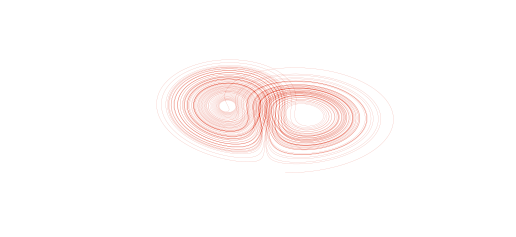

<function python.f03.plot_la>

In [ ]:
interact(plot_la)

In [ ]:
# Jupyter notebook setup
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())